In [2]:
import pandas as pd

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('salesMKJktSby.csv')

In [4]:
df

,Cabang,Invoice_ID,Date,Kode Pelanggan,Nama Pelanggan,Lokasi,Kode_Item,Nama_Item,Jumlah,Harga,Potongan%,Total
0,Surabaya,0058/KSR/MKSBY/0923,9/2/2023,UMUM,UMUM/CASH,Undefined,MKGS0001,Matan Ta'lim Muta'alim Renggang,1,6500,5,6175
1,Surabaya,0059/KSR/MKSBY/0923,9/2/2023,UMUM,UMUM/CASH,Undefined,MKI00017,Fathul Mu'in Jilid 1 CD 385,1,54900,5,52155
2,Surabaya,0059/KSR/MKSBY/0923,9/2/2023,UMUM,UMUM/CASH,Undefined,MKI00018,Fathul Mu'in Jilid 2 CD 437,1,57000,5,54150
3,Surabaya,0059/KSR/MKSBY/0923,9/2/2023,UMUM,UMUM/CASH,Undefined,MKI00019,Fathul Mu'in Jilid 3 CD 526,1,63000,5,59850
4,Surabaya,0059/KSR/MKSBY/0923,9/2/2023,UMUM,UMUM/CASH,Undefined,MKI00021,Fathul Qorib Jilid 1 CD 334,1,39900,5,37905
...,...,...,...,...,...,...,...,...,...,...,...,...
9476,Jakarta,1358/KSR/UTM/0924,9/30/2024,UMUM,UMUM/CASH,Undefined,MKQ00002,Al-Qur'an Tanggung Resleting HVS 624,2,59500,40,71400
9477,Jakarta,1359/KSR/UTM/0924,9/30/2024,UMUM,UMUM/CASH,Undefined,MKB00001,Berjanji Tanggung CD Hijau,3,23000,21,54000
9478,Jakarta,1359/KSR/UTM/0924,9/30/2024,UMUM,UMUM/CASH,Undefined,MKB00004,Berjanji Besar HVS Hijau,1,32000,18,26000
9479,Jakarta,1360/KSR/UTM/0924,9/30/2024,UMUM,UMUM/CASH,Undefined,MKI00071,Tuntunan Fiqih Shalat & Wirid CD 128,1,6500,23,5000


In [8]:
data_description = df.describe(include='all').transpose()
data_description


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Cabang,9481,2,Jakarta,6782,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Invoice_ID,9481,3526,0026/JL/UTM/1023.,95,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Date,9481,313,10/20/2023,122,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Kode Pelanggan,9481,70,UMUM,7665,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Nama Pelanggan,9481,84,UMUM/CASH,7665,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Lokasi,9481,79,Undefined,7766,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Kode_Item,9481,1077,MKGS0001,123,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Nama_Item,9481,1078,Matan Ta'lim Muta'alim Renggang,123,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Jumlah,9481.0,NaN,NaN,NaN,25.339627,96.727833,0.0,1.0,3.0,10.0,2000.0
Harga,9481.0,NaN,NaN,NaN,25926.764054,44214.876745,1000.0,7500.0,13800.0,29000.0,1515000.0


In [11]:
df['Date'] = pd.to_datetime(df['Date'], format='%m/%d/%Y')
df['Jumlah'] = pd.to_numeric(df['Jumlah'])
df['Harga'] = pd.to_numeric(df['Harga'])
df['Potongan%'] = pd.to_numeric(df['Potongan%'])
df['Total'] = pd.to_numeric(df['Total'])

In [13]:
print(df.isnull().sum())

Cabang            0
Invoice_ID        0
Date              0
Kode Pelanggan    0
Nama Pelanggan    0
Lokasi            0
Kode_Item         0
Nama_Item         0
Jumlah            0
Harga             0
Potongan%         0
Total             0
dtype: int64


In [16]:
# Identify anomalies where 'Jumlah', 'Harga', or 'Total' have values <= 0
anomalies = df[(df['Jumlah'] <= 0) | (df['Harga'] <= 0) | (df['Total'] <= 0)]
anomalies

,Cabang,Invoice_ID,Date,Kode Pelanggan,Nama Pelanggan,Lokasi,Kode_Item,Nama_Item,Jumlah,Harga,Potongan%,Total
665,Jakarta,0171/KSR/UTM/0923,2023-09-26,UMUM,UMUM/CASH,Undefined,MKI00040,Terjemah Al Berjanji HVS 164,0,22500,11,0
1138,Jakarta,0026/JL/UTM/1023.,2023-10-20,UMUM,UMUM/CASH,Undefined,MKGD0014,900 Materi Pokok,1,45000,100,0
1147,Jakarta,0026/JL/UTM/1023.,2023-10-20,UMUM,UMUM/CASH,Undefined,MKK00010,Kalender 4 Lembar Kaligrafi ART MK 2024,11,7200,100,0
1149,Jakarta,0026/JL/UTM/1023.,2023-10-20,UMUM,UMUM/CASH,Undefined,MKK00004,Kalender 6 Lembar Kosongan Masjid MK 2024,13,9100,100,0
1206,Jakarta,0026/JL/UTM/1023.,2023-10-20,UMUM,UMUM/CASH,Undefined,MKMCA0035,Sam Pengenalan Fiqih,1,10500,100,0
1210,Jakarta,0026/JL/UTM/1023.,2023-10-20,UMUM,UMUM/CASH,Undefined,MKMCA0087,Sam Tuntunan Do'a Sehari Hari,1,10500,100,0
1229,Jakarta,0026/JL/UTM/1023.,2023-10-20,UMUM,UMUM/CASH,Undefined,MKI00038,Terjemah Juz' Amma Tanggung HVS 116,4,16900,100,0
2734,Jakarta,0742/KSR/UTM/1223,2023-12-30,UMUM,UMUM/CASH,Undefined,MKGS0003,Matan Arba'in Nawawi Renggang,0,3500,20,0
2810,Jakarta,0002/JL/UTM/0124,2024-01-04,UMUM,UMUM/CASH,Undefined,MKMSXH0001,Finger Counter,41,10000,100,0
2811,Jakarta,0003/JL/UTM/0124,2024-01-04,UMUM,UMUM/CASH,Undefined,MKMSXH0003,Counter Warna,2,25000,100,0


The rows were flagged as anomalies because they meet one or more of the following criteria based on the conditions provided:
1.	Jumlah (Quantity): A value of 0 is flagged as anomalous because it implies no items were purchased, which could indicate incorrect or incomplete data entry.
2.	Harga (Price): If the price of an item is less than or equal to 0, it is flagged. Items with zero or negative prices are not realistic in a typical sales dataset.
3.	Total (Total Sales): A value of 0 is flagged because it suggests no revenue was generated from the transaction, which may indicate a problem with how the total was calculated or recorded.

Examples:

- Row 665: Jumlah is 0, meaning no items were purchased, but there is a price recorded, which is inconsistent.
- Row 1138: Potongan% (discount) is 100%, resulting in a Total of 0. While a 100% discount could be valid, it is unusual and worth investigating.
- Rows 1147 and 1149: Both have high discounts (100%), which reduce Total to 0, despite non-zero Jumlah and Harga.

These anomalies may represent:
- Errors in data entry or calculations.
- Unique or edge cases, such as promotional offers (e.g., 100% discounts).

In [19]:
# Calculate min and max values for specified columns and display them in a table
min_max_summary = df[['Jumlah', 'Harga', 'Potongan%', 'Total']].agg(['min', 'max'])
min_max_summary

,Jumlah,Harga,Potongan%,Total
min,0,1000,0,0
max,2000,1515000,100,32686500


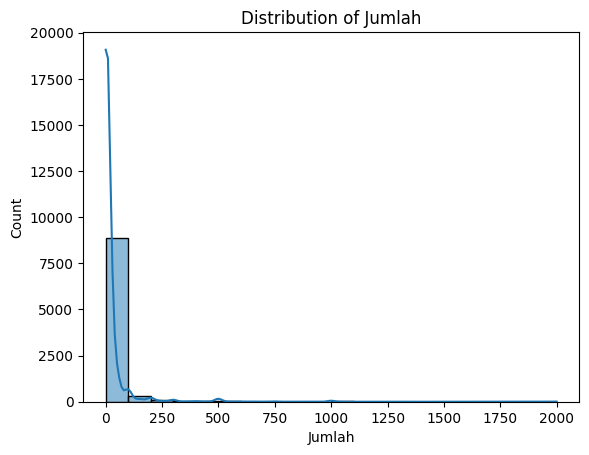

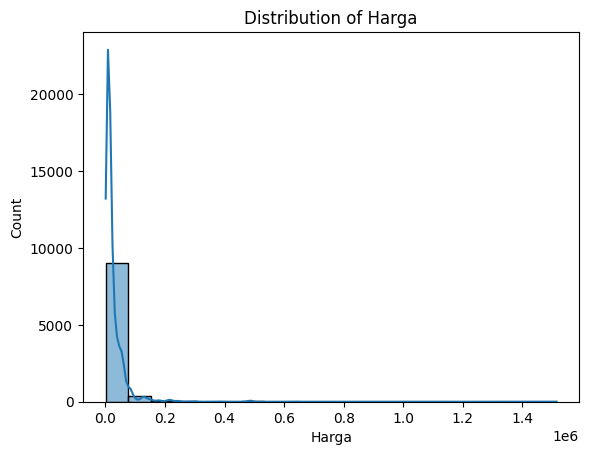

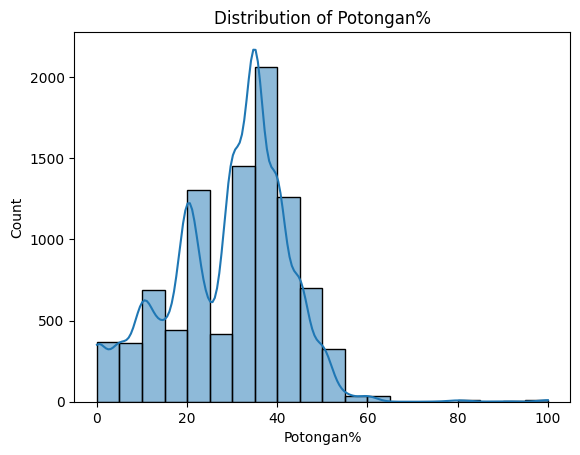

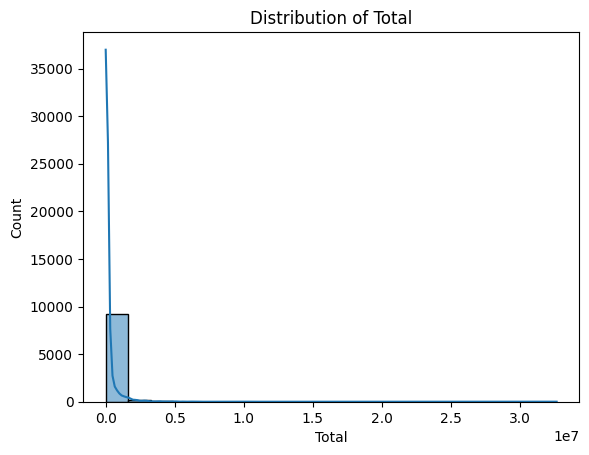

In [20]:
for col in ['Jumlah', 'Harga', 'Potongan%', 'Total']:
    sns.histplot(df[col], kde=True, bins=20)
    plt.title(f'Distribution of {col}')
    plt.show()

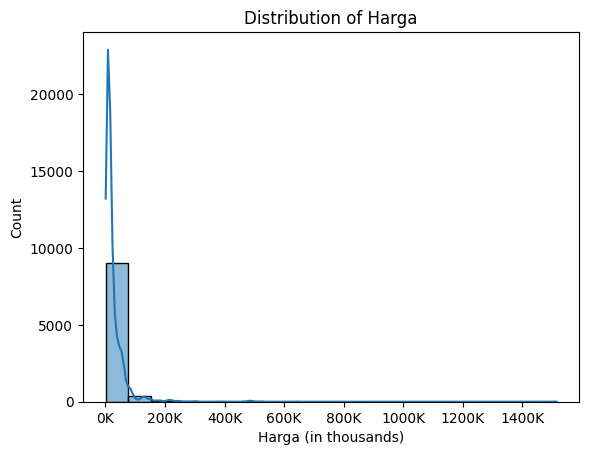

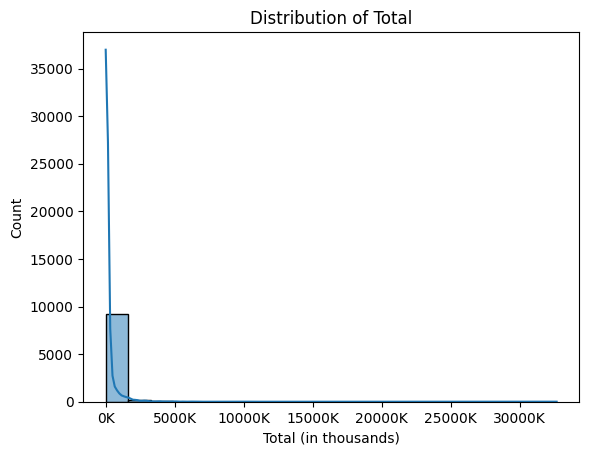

In [22]:
# Re-importing necessary libraries for plotting
import seaborn as sns
import matplotlib.pyplot as plt

# Adjusting the scale for 'Harga'
sns.histplot(df['Harga'], kde=True, bins=20)
plt.title('Distribution of Harga')
plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{int(x / 1000)}K'))  # Convert to 'K' (thousands)
plt.xlabel('Harga (in thousands)')
plt.ylabel('Count')
plt.show()

# Adjusting the scale for 'Total'
sns.histplot(df['Total'], kde=True, bins=20)
plt.title('Distribution of Total')
plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{int(x / 1000)}K'))  # Convert to 'K' (thousands)
plt.xlabel('Total (in thousands)')
plt.ylabel('Count')
plt.show()

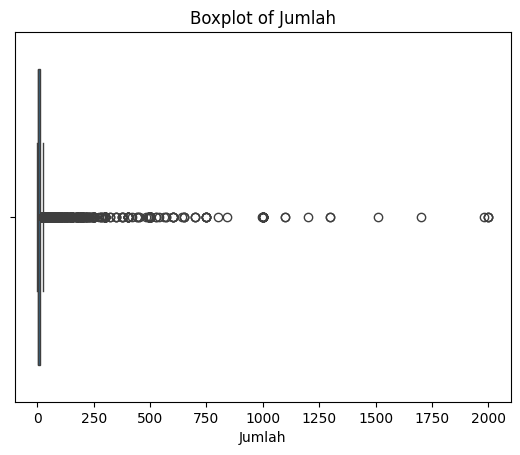

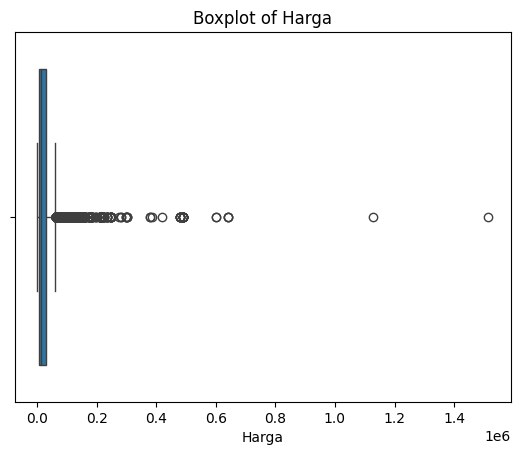

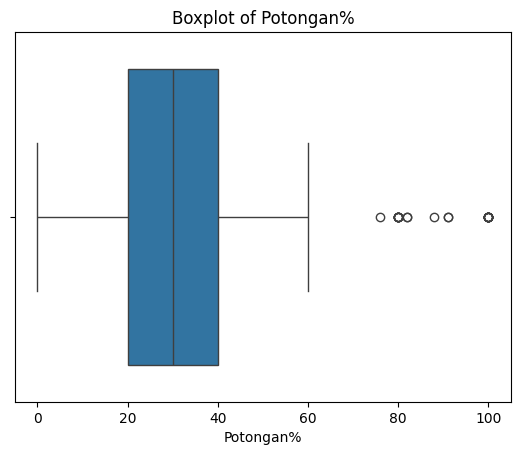

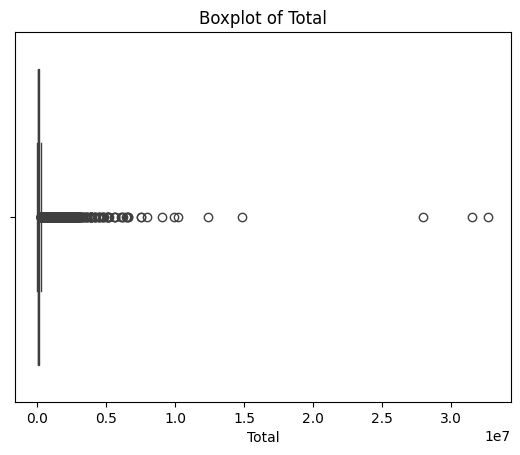

In [23]:
for col in ['Jumlah', 'Harga', 'Potongan%', 'Total']:
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

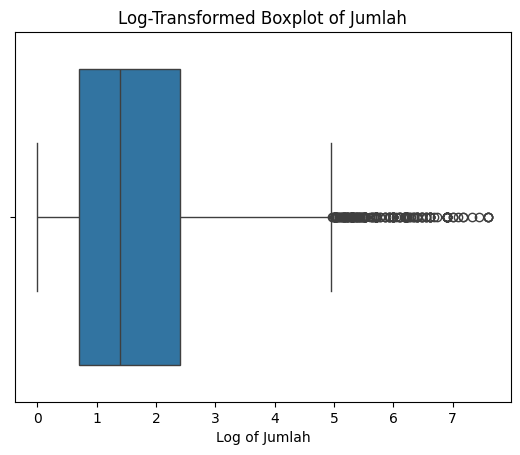

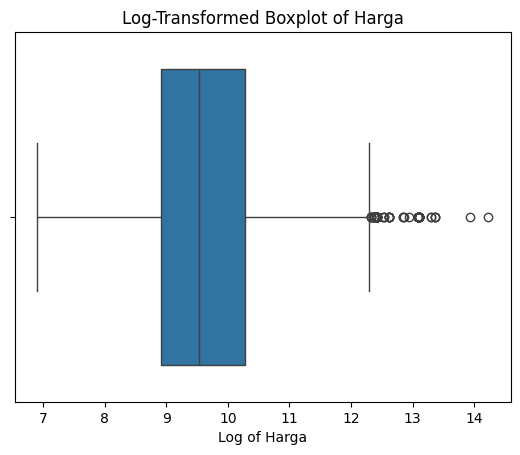

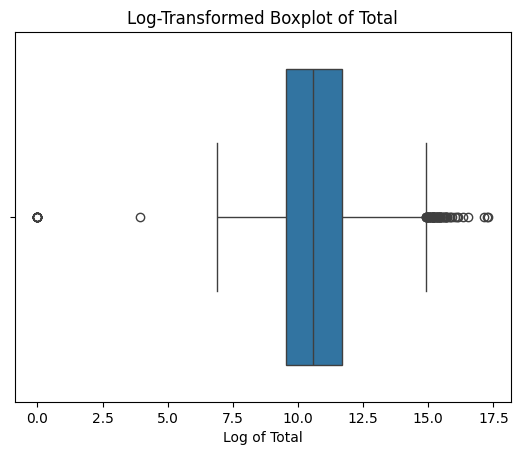

In [24]:
# Define the columns for transformation
columns = ['Jumlah', 'Harga', 'Total']

# Plot log-transformed boxplots
for col in columns:
    sns.boxplot(x=np.log1p(df[col]))  # np.log1p applies log(1 + x) transformation
    plt.title(f'Log-Transformed Boxplot of {col}')
    plt.xlabel(f'Log of {col}')
    plt.show()

Why Use Logarithmic Transformation?

1.	Compress Large Values: Logarithmic transformation compresses the range of large values, reducing their influence on visualizations or models.
2.	Handle Skewness: It transforms a highly skewed distribution into something closer to normal distribution.
3.	Improve Interpretability: Log-transformed data can help reveal trends or patterns that are hidden due to extreme values.

Example:

If the original values for Harga are:
- 1,000
- 10,000
- 1,000,000

The logarithmic transformation (base  e ) would convert these to:
-  \log(1,000+1) \approx 6.91 
-  \log(10,000+1) \approx 9.21 
-  \log(1,000,000+1) \approx 13.82 

This results in a much narrower range of values, making the data easier to visualize and interpret.

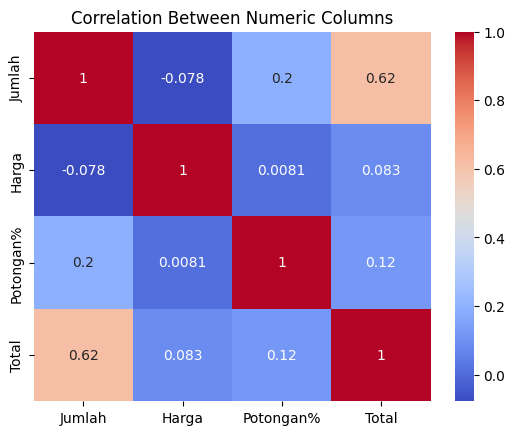

In [25]:
correlation_matrix = df[['Jumlah', 'Harga', 'Potongan%', 'Total']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Between Numeric Columns')
plt.show()

In [30]:
# Recreate the analysis as the variable 'discount_analysis' is not defined in this session
discount_ranges = pd.cut(df['Potongan%'], bins=[0, 10, 20, 50, 100], labels=['0-10%', '10-20%', '20-50%', '50-100%'])
discount_analysis = df.groupby(discount_ranges).agg({'Jumlah': 'sum', 'Total': 'sum', 'Potongan%': 'count'})
discount_analysis.rename(columns={'Potongan%': 'Count'}, inplace=True)

# Convert 'Total' column to Rupiah format
discount_analysis['Total'] = discount_analysis['Total'].apply(lambda x: f"Rp {x:,.0f}")

# Rename columns to make the distinction clear
discount_analysis.rename(columns={
    'Jumlah': 'Total Quantity Sold (Jumlah)',
    'Count': 'Number of Transactions (Count)'
}, inplace=True)

discount_analysis

,Total Quantity Sold (Jumlah),Total,Number of Transactions (Count)
Potongan%,,,
0-10%,1989,"Rp 27,428,415",801
10-20%,4820,"Rp 70,666,073",1537
20-50%,207951,"Rp 1,617,833,144",6683
50-100%,11873,"Rp 48,785,912",122


In [32]:
# Get the top 20 items with the highest discount counts
top_20_discount_items = df.groupby(['Kode_Item', 'Nama_Item'])['Potongan%'].count().sort_values(ascending=False).head(20)

# Display the top 20 items
top_20_discount_items

Kode_Item  Nama_Item                                                 
MKGS0001   Matan Ta'lim Muta'alim Renggang                               123
MKGS0011   Matan Ghoyatu Wat Taqrib Renggang                              97
MKK00002   Kalender 12 Lembar Kosongan HVS MK 2024                        93
MKK00004   Kalender 6 Lembar Kosongan Masjid MK 2024                      88
MKI00021   Fathul Qorib Jilid 1 CD 334                                    84
MKGS0003   Matan Arba'in Nawawi Renggang                                  81
MKI00017   Fathul Mu'in Jilid 1 CD 385                                    80
MKGS0004   Matan Lubabul Hadist Renggang                                  78
MKGS0005   Matan Washiyatul Musthofa Renggang                             78
MKQ00001   Al-Qur'an Tanggung Lux HVS 624                                 75
MKK00009   Kalender 4 Lembar Tokoh NU ART MK 2024                         75
MKYI00019  Terjemah Yasin Fadhilah + 7Ayat Munjiyat Bsr HVS 96/Orange     72
MKI000

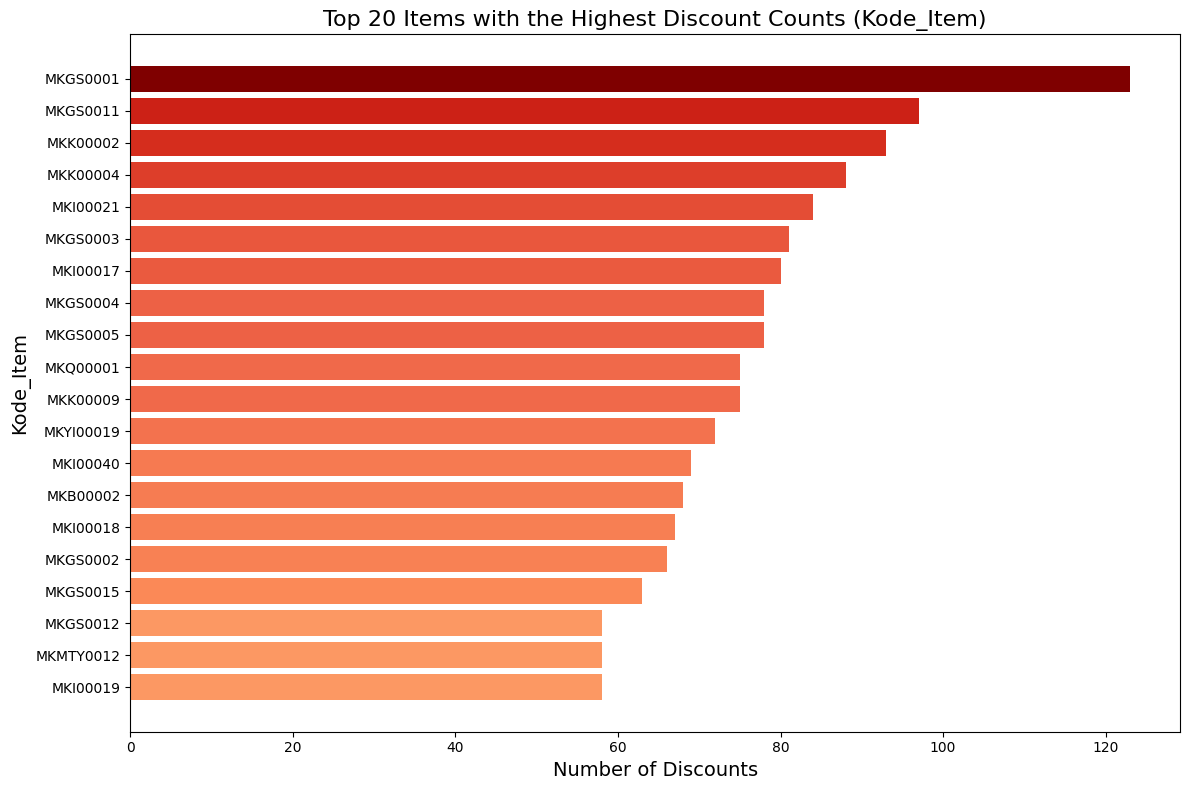

In [36]:
# Create a bar chart using a color gradient (warm colors)
plt.figure(figsize=(12, 8))
colors = plt.cm.OrRd(top_20_discount_items['Potongan%'] / max(top_20_discount_items['Potongan%']))

plt.barh(top_20_discount_items['Kode_Item'], top_20_discount_items['Potongan%'], color=colors)
plt.title('Top 20 Items with the Highest Discount Counts (Kode_Item)', fontsize=16)
plt.xlabel('Number of Discounts', fontsize=14)
plt.ylabel('Kode_Item', fontsize=14)
plt.gca().invert_yaxis()  # Invert y-axis for better readability
plt.tight_layout()
plt.show()

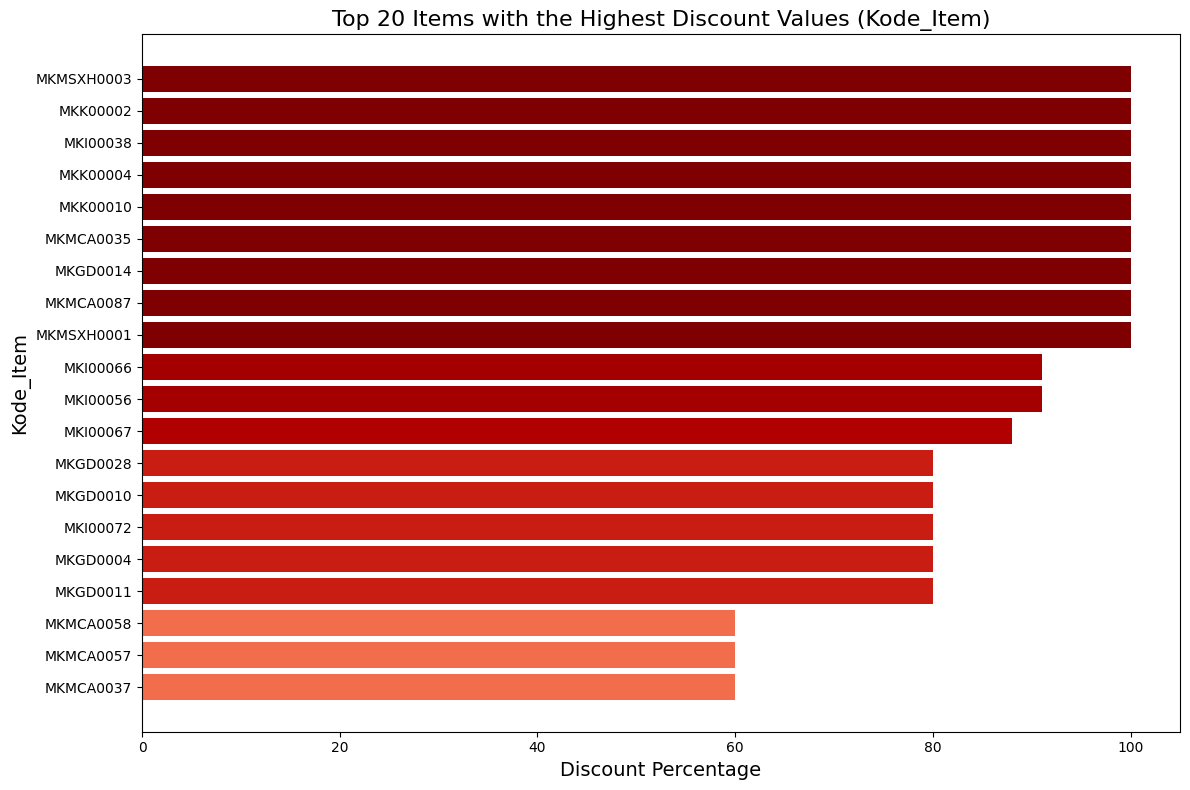

In [38]:
# Recreate the analysis for the highest discounts since the variable is not defined
top_20_highest_discounts = df.groupby(['Kode_Item', 'Nama_Item'])['Potongan%'].max().sort_values(ascending=False).head(20).reset_index()

# Create a bar chart with color grading for the highest discount values
plt.figure(figsize=(12, 8))
colors = plt.cm.OrRd(top_20_highest_discounts['Potongan%'] / max(top_20_highest_discounts['Potongan%']))

plt.barh(top_20_highest_discounts['Kode_Item'], top_20_highest_discounts['Potongan%'], color=colors)
plt.title('Top 20 Items with the Highest Discount Values (Kode_Item)', fontsize=16)
plt.xlabel('Discount Percentage', fontsize=14)
plt.ylabel('Kode_Item', fontsize=14)
plt.gca().invert_yaxis()  # Invert y-axis for better readability
plt.tight_layout()
plt.show()

In [40]:
# Recreate the variables needed to get the ranks since 'common_kode_items_list' is not defined

# Find the intersection of Kode_Items from the two analyses
top_discount_counts_items = set(top_20_discount_items['Kode_Item'])
top_highest_discounts_items = set(top_20_highest_discounts['Kode_Item'])
common_kode_items_list = list(top_discount_counts_items.intersection(top_highest_discounts_items))

# Rank in Top Discount Counts
rank_discount_counts = top_20_discount_items.reset_index()
rank_discount_counts['Rank'] = rank_discount_counts.index + 1
discount_counts_ranks = rank_discount_counts[rank_discount_counts['Kode_Item'].isin(common_kode_items_list)]

# Rank in Top Discount Values
rank_highest_discounts = top_20_highest_discounts.reset_index()
rank_highest_discounts['Rank'] = rank_highest_discounts.index + 1
highest_discounts_ranks = rank_highest_discounts[rank_highest_discounts['Kode_Item'].isin(common_kode_items_list)]

# Combine the ranks into a single table
combined_ranks = pd.merge(
    discount_counts_ranks[['Kode_Item', 'Rank']].rename(columns={'Rank': 'Rank in Discount Counts'}),
    highest_discounts_ranks[['Kode_Item', 'Rank']].rename(columns={'Rank': 'Rank in Discount Values'}),
    on='Kode_Item'
)

combined_ranks

,Kode_Item,Rank in Discount Counts,Rank in Discount Values
0,MKK00002,3,2
1,MKK00004,4,4


In [41]:
# Filter the dataset for the two Kode_Items
common_kode_items_list = ['MKK00002', 'MKK00004']
common_items_details = df[df['Kode_Item'].isin(common_kode_items_list)]

# Summarize the required details
common_items_summary = common_items_details.groupby(['Kode_Item', 'Nama_Item']).agg({
    'Harga': 'mean',  # Average price (Harga)
    'Jumlah': 'sum',  # Total quantity sold (Jumlah)
    'Total': 'sum'    # Total sales
}).rename(columns={
    'Harga': 'Average Harga',
    'Jumlah': 'Total Jumlah Sold',
    'Total': 'Total Sales'
})

# Display the summary
common_items_summary

Average Harga  \
Kode_Item Nama_Item                                                  
MKK00002  Kalender 12  Lembar Kosongan HVS MK 2024    11600.000000   
          Kalender 12 Lembar Kosongan HVS MK 2024     11597.849462   
MKK00004  Kalender 6 Lembar Kosongan Masjid MK 2024    9098.863636   

                                                     Total Jumlah Sold  \
Kode_Item Nama_Item                                                      
MKK00002  Kalender 12  Lembar Kosongan HVS MK 2024                   2   
          Kalender 12 Lembar Kosongan HVS MK 2024                 1087   
MKK00004  Kalender 6 Lembar Kosongan Masjid MK 2024               2284   

                                                     Total Sales  
Kode_Item Nama_Item                                               
MKK00002  Kalender 12  Lembar Kosongan HVS MK 2024          9164  
          Kalender 12 Lembar Kosongan HVS MK 2024        9980952  
MKK00004  Kalender 6 Lembar Kosongan Masjid MK 2024     14929936

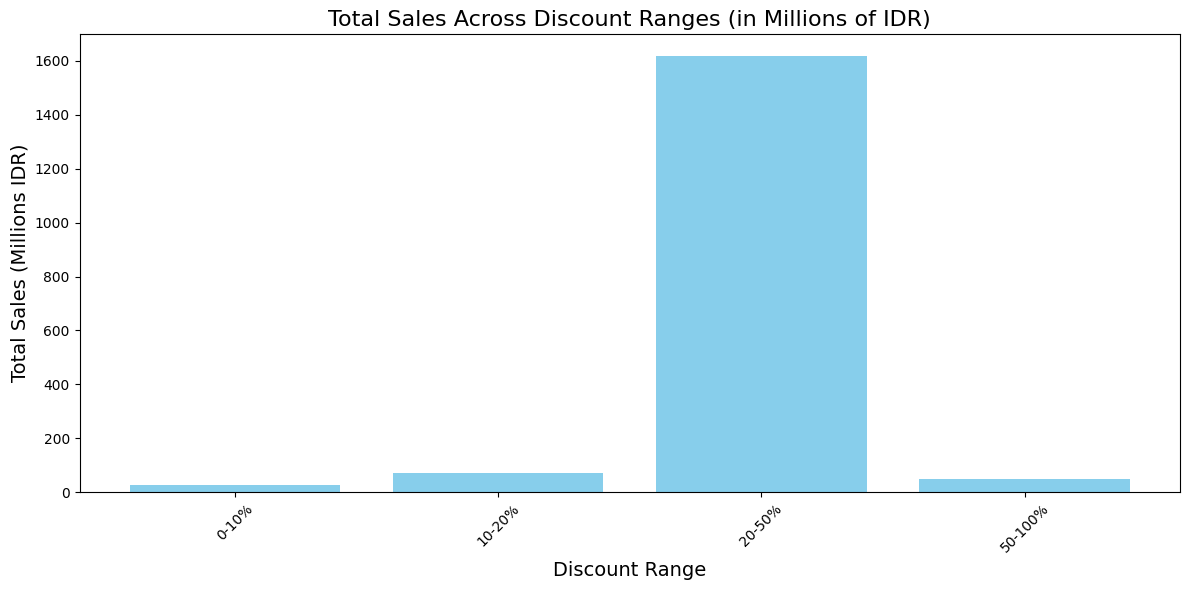

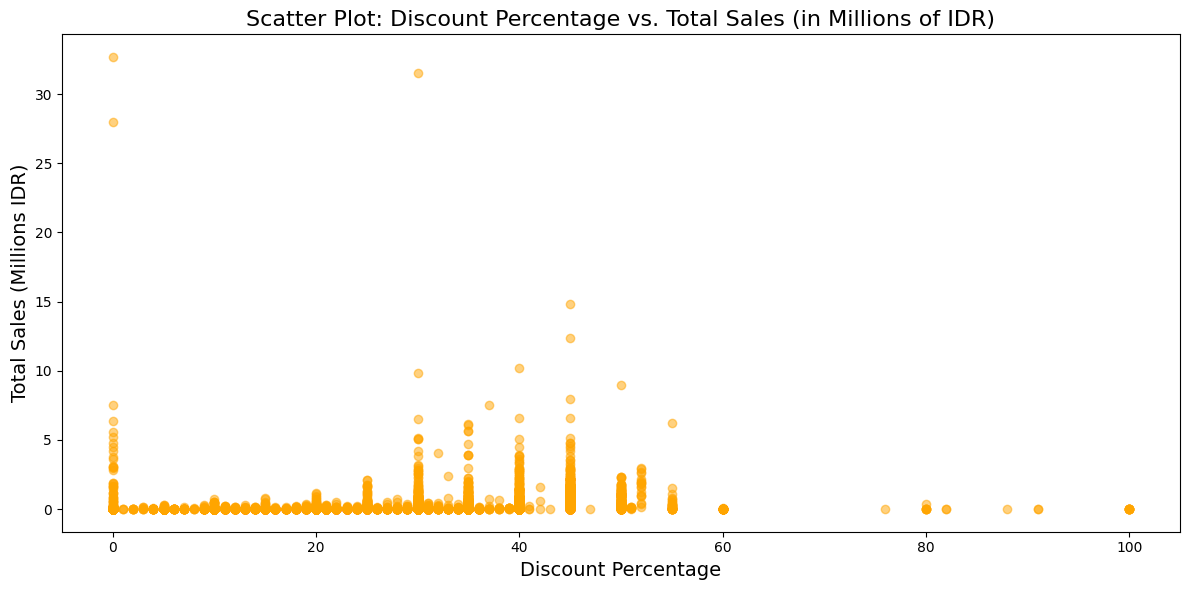

In [45]:
# Group items into discount ranges and analyze total sales and quantity sold
discount_ranges = pd.cut(df['Potongan%'], bins=[0, 10, 20, 50, 100], labels=['0-10%', '10-20%', '20-50%', '50-100%'])
discount_impact = df.groupby(discount_ranges).agg({
    'Jumlah': 'sum',  # Total quantity sold
    'Total': 'sum'    # Total sales
}).rename(columns={
    'Jumlah': 'Total Quantity Sold',
    'Total': 'Total Sales'
})

# Convert Total Sales to millions of IDR for readability
discount_impact['Total Sales (Millions)'] = discount_impact['Total Sales'] / 1e6

# Visualize the updated bar chart with total sales in millions of IDR
plt.figure(figsize=(12, 6))
plt.bar(discount_impact.index, discount_impact['Total Sales (Millions)'], color='skyblue')
plt.title('Total Sales Across Discount Ranges (in Millions of IDR)', fontsize=16)
plt.xlabel('Discount Range', fontsize=14)
plt.ylabel('Total Sales (Millions IDR)', fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Update scatter plot for discounts vs. total sales (in millions of IDR)
plt.figure(figsize=(12, 6))
plt.scatter(df['Potongan%'], df['Total'] / 1e6, alpha=0.5, color='orange')
plt.title('Scatter Plot: Discount Percentage vs. Total Sales (in Millions of IDR)', fontsize=16)
plt.xlabel('Discount Percentage', fontsize=14)
plt.ylabel('Total Sales (Millions IDR)', fontsize=14)
plt.tight_layout()
plt.show()

1. Bar Chart: Total Sales Across Discount Ranges (in Millions of IDR)

- Key Observations:
    - The 20-50% discount range generates the highest total sales, significantly overshadowing other ranges.
    - The 10-20% discount range contributes moderately to total sales but is still far behind the 20-50% range.
    - The 50-100% discount range and 0-10% discount range result in much lower sales volumes, indicating that extreme discounts (either very low or very high) are less effective in driving sales.
- Implications:
    - The 20-50% discount range appears to be a “sweet spot” for maximizing sales.
    - Offering very high discounts (e.g., 50-100%) may not necessarily lead to proportional increases in total sales, potentially reducing profit margins unnecessarily.

2. Scatter Plot: Discount Percentage vs. Total Sales (in Millions of IDR)

- Key Observations:
    - The scatter plot shows a high concentration of sales data at lower discount percentages (0-20%).
    - While some higher discount percentages (e.g., 30-50%) occasionally result in significant sales, there is no clear linear relationship between the discount percentage and total sales.
    - Outliers exist where items with both high and low discounts achieve unexpectedly high sales.
- Implications:
    - Discounts alone are not the sole driver of high sales. Other factors, such as product demand, brand loyalty, or seasonal trends, could play a significant role.
    - Extreme discounts (>50%) are rare and do not consistently lead to higher total sales, suggesting diminishing returns on deep discounts.

Summary and Recommendations

- Focus on the 20-50% Discount Range: The bar chart clearly indicates that this range maximizes total sales. Efforts should be concentrated on optimizing promotions within this range.
- Investigate Non-Discount Factors: The scatter plot implies that factors other than discounts, such as product popularity or market trends, heavily influence sales. Analyzing product-level performance can provide deeper insights.
- Avoid Over-Discounting: Discounts greater than 50% do not show consistent returns in terms of increased sales and may unnecessarily erode profit margins.
- Leverage Moderate Discounts: Discounts in the 10-20% range, while not as impactful as 20-50%, still generate reasonable sales and should not be overlooked.

/var/folders/h7/h35yndk503d7sm40yx3_17b80000gn/T/ipykernel_1516/1015388306.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_10_items['Revenue Contribution (%)'] = (top_10_items['Total Sales'] / total_revenue) * 100
/var/folders/h7/h35yndk503d7sm40yx3_17b80000gn/T/ipykernel_1516/1015388306.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_10_items['Total Sales (Rp)'] = top_10_items['Total Sales'].apply(lambda x: f"Rp {x:,.0f}")


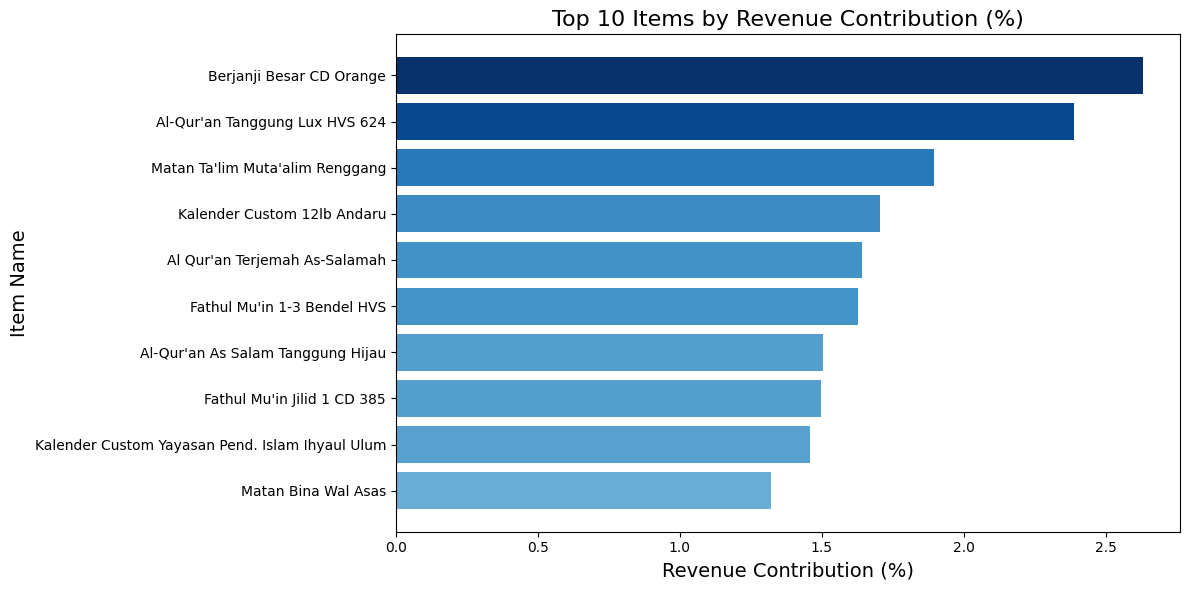

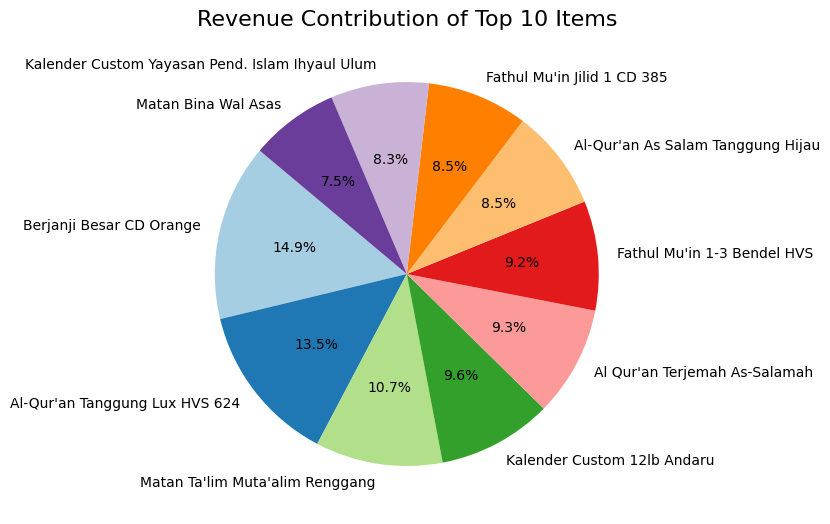

,,Total Quantity Sold,Total Sales (Rp),Revenue Contribution (%)
Kode_Item,Nama_Item,,,
MKB00002,Berjanji Besar CD Orange,3006,"Rp 50,421,917",2.629066
MKQ00001,Al-Qur'an Tanggung Lux HVS 624,1612,"Rp 45,771,218",2.386573
MKGS0001,Matan Ta'lim Muta'alim Renggang,9991,"Rp 36,305,034",1.892993
MKK00011,Kalender Custom 12lb Andaru,1981,"Rp 32,686,500",1.704318
MKMASY0001,Al Qur'an Terjemah As-Salamah,250,"Rp 31,500,000",1.642452
MKI00020,Fathul Mu'in 1-3 Bendel HVS,417,"Rp 31,236,124",1.628693
MKQ00009,Al-Qur'an As Salam Tanggung Hijau,752,"Rp 28,863,016",1.504956
MKI00017,Fathul Mu'in Jilid 1 CD 385,918,"Rp 28,719,806",1.497489
MK_P0052,Kalender Custom Yayasan Pend. Islam Ihyaul Ulum,1512,"Rp 27,972,000",1.458498


In [49]:
# Identify best-selling products based on total quantity sold (Jumlah) and total sales value (Total Sales)
top_performers = df.groupby(['Kode_Item', 'Nama_Item']).agg({
    'Jumlah': 'sum',
    'Total': 'sum'
}).rename(columns={
    'Jumlah': 'Total Quantity Sold',
    'Total': 'Total Sales'
}).sort_values(by='Total Sales', ascending=False)

# Select the top 10 items based on Total Sales
top_10_items = top_performers.head(10)

# Calculate percentage contribution to total revenue for these top items
total_revenue = df['Total'].sum()
top_10_items['Revenue Contribution (%)'] = (top_10_items['Total Sales'] / total_revenue) * 100

# Convert total sales to Rupiah format for better readability
top_10_items['Total Sales (Rp)'] = top_10_items['Total Sales'].apply(lambda x: f"Rp {x:,.0f}")

# Create a bar chart with color grading for the revenue contribution percentages
plt.figure(figsize=(12, 6))

# Generate a color gradient based on the percentage values
colors = plt.cm.Blues(top_10_items['Revenue Contribution (%)'] / max(top_10_items['Revenue Contribution (%)']))

plt.barh(top_10_items.index.get_level_values('Nama_Item'), 
         top_10_items['Revenue Contribution (%)'], color=colors)
plt.title('Top 10 Items by Revenue Contribution (%)', fontsize=16)
plt.xlabel('Revenue Contribution (%)', fontsize=14)
plt.ylabel('Item Name', fontsize=14)
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

# Visualization: Pie chart for top 10 items' revenue contribution
plt.figure(figsize=(8, 8))
plt.pie(top_10_items['Revenue Contribution (%)'], labels=top_10_items.index.get_level_values('Nama_Item'), 
        autopct='%1.1f%%', colors=plt.cm.Paired.colors, startangle=140)
plt.title('Revenue Contribution of Top 10 Items', fontsize=16)
plt.tight_layout()
plt.show()

# Display the updated top 10 items with contributions in Rupiah
top_10_items_display = top_10_items[['Total Quantity Sold', 'Total Sales (Rp)', 'Revenue Contribution (%)']]
top_10_items_display

### Observations

1.	Top Revenue Contributor:
    - “Berjanji Besar CD Orange” contributes the highest revenue, accounting for 2.63% of total sales, with a total sales value of Rp 50,421,917. This highlights it as a significant product in terms of sales performance, despite its moderate quantity sold compared to some others.
2.	High Sales with Moderate Quantities:
    - Products like “Al-Qur’an Tanggung Lux HVS 624” and “Kalender Custom 12lb Andaru” also contribute significantly to revenue despite selling fewer units. This suggests a higher unit price, making them valuable contributors to the overall revenue.
3.	High Quantity but Moderate Revenue:
    - “Matan Ta’lim Muta’alim Renggang” is sold in very high quantities (9,991 units) but contributes only 1.89% to total revenue, indicating a lower unit price compared to the top-selling items. This product drives volume but has a smaller impact on revenue percentage-wise.
4.	Balanced Performance:
    - Items such as “Fathul Mu’in 1-3 Bendel HVS” and “Al-Qur’an As Salam Tangguh Hijau” show balanced performance with moderate quantities and contributions to revenue, indicating steady sales.
5.	Revenue Distribution:
    - The top 10 items collectively account for a noticeable portion of the total revenue. However, the highest-contributing product only contributes 2.63%, suggesting that revenue is widely distributed across various products rather than being concentrated in a few items.

### Business Implications:

1.	Focus on High-Revenue Items:
    - Products like “Berjanji Besar CD Orange” and “Al-Qur’an Tanggung Lux HVS 624” are key drivers of revenue. Marketing efforts could emphasize these items to maximize profitability.
2.	Volume vs. Value Analysis:
    - Products like “Matan Ta’lim Muta’alim Renggang” contribute significantly through volume rather than price. Consider exploring price optimization strategies for high-volume items to increase their revenue contribution.
3.	Diversified Revenue Base:
    - The distribution of revenue among the top 10 items highlights a balanced product portfolio. This minimizes risks associated with over-reliance on a single product.
4.	Upselling Opportunities:
    - High-value products such as “Kalender Custom 12lb Andaru” and “Al-Qur’an Tanggung Lux HVS 624” can be bundled with complementary items to drive additional revenue.

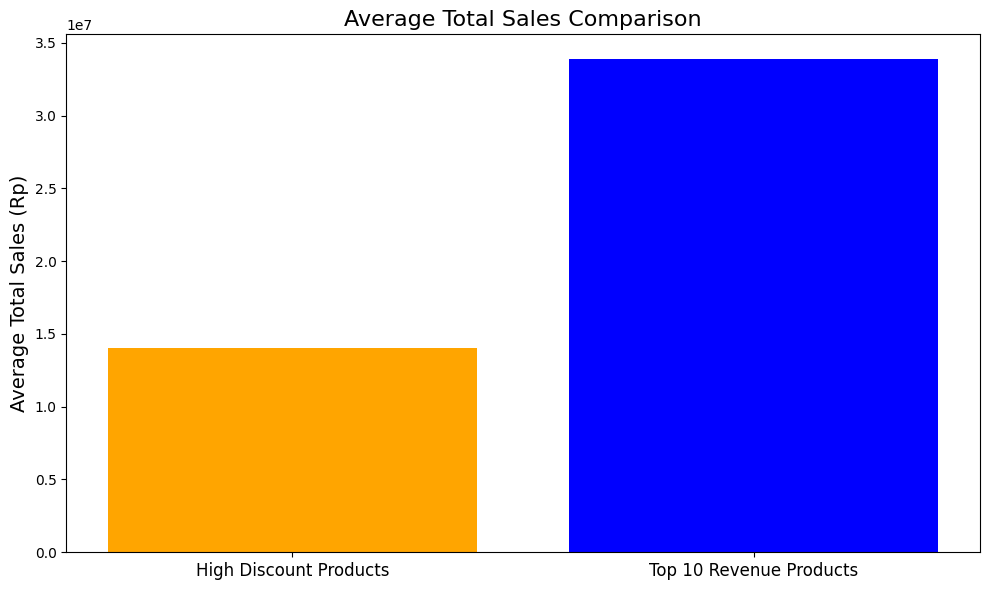

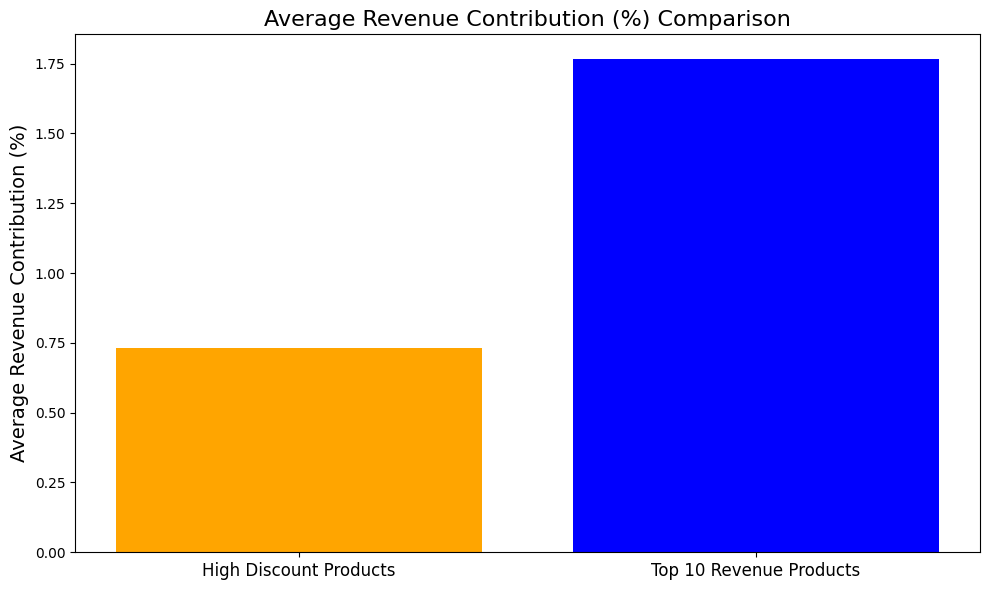

,Category,Average Total Sales (Rp),Average Revenue Contribution (%)
0,High Discount Products,"Rp 14,060,484",0.733132
1,Top 10 Revenue Products,"Rp 33,881,359",1.766619


In [52]:
# Extract the top products with high discounts
high_discount_products = set(['MKGS0001', 'MKGS0011', 'MKMSXH0003', 'MKK00002', 'MKI00038'])

# Filter revenue data for high discount products
high_discount_sales = df[df['Kode_Item'].isin(high_discount_products)].groupby('Kode_Item').agg({
    'Total': 'sum'
}).rename(columns={'Total': 'Total Sales'})

# Calculate revenue contribution percentage for high discount products
high_discount_sales['Revenue Contribution (%)'] = (high_discount_sales['Total Sales'] / total_revenue) * 100

# Calculate averages for high discount products
avg_high_discount_sales = high_discount_sales['Total Sales'].mean()
avg_high_discount_contribution = high_discount_sales['Revenue Contribution (%)'].mean()

# Calculate averages for the top 10 revenue products
avg_top_10_sales = top_10_items['Total Sales'].mean()
avg_top_10_contribution = top_10_items['Revenue Contribution (%)'].mean()

# Combine data for comparison
comparison_df = pd.DataFrame({
    'Category': ['High Discount Products', 'Top 10 Revenue Products'],
    'Average Total Sales (Rp)': [avg_high_discount_sales, avg_top_10_sales],
    'Average Revenue Contribution (%)': [avg_high_discount_contribution, avg_top_10_contribution]
})

# Format the "Average Total Sales (Rp)" column as Rupiah
comparison_df['Average Total Sales (Rp)'] = comparison_df['Average Total Sales (Rp)'].apply(lambda x: f"Rp {x:,.0f}")

# Visualization: Bar chart for total sales
plt.figure(figsize=(10, 6))
colors_sales = ['orange', 'blue']
plt.bar(comparison_df['Category'], 
        [avg_high_discount_sales, avg_top_10_sales], 
        color=colors_sales)
plt.title('Average Total Sales Comparison', fontsize=16)
plt.ylabel('Average Total Sales (Rp)', fontsize=14)
plt.xticks(fontsize=12)
plt.tight_layout()
plt.show()

# Visualization: Bar chart for revenue contribution
plt.figure(figsize=(10, 6))
colors_contribution = ['orange', 'blue']
plt.bar(comparison_df['Category'], 
        [avg_high_discount_contribution, avg_top_10_contribution], 
        color=colors_contribution)
plt.title('Average Revenue Contribution (%) Comparison', fontsize=16)
plt.ylabel('Average Revenue Contribution (%)', fontsize=14)
plt.xticks(fontsize=12)
plt.tight_layout()
plt.show()

# Display the comparison DataFrame
comparison_df

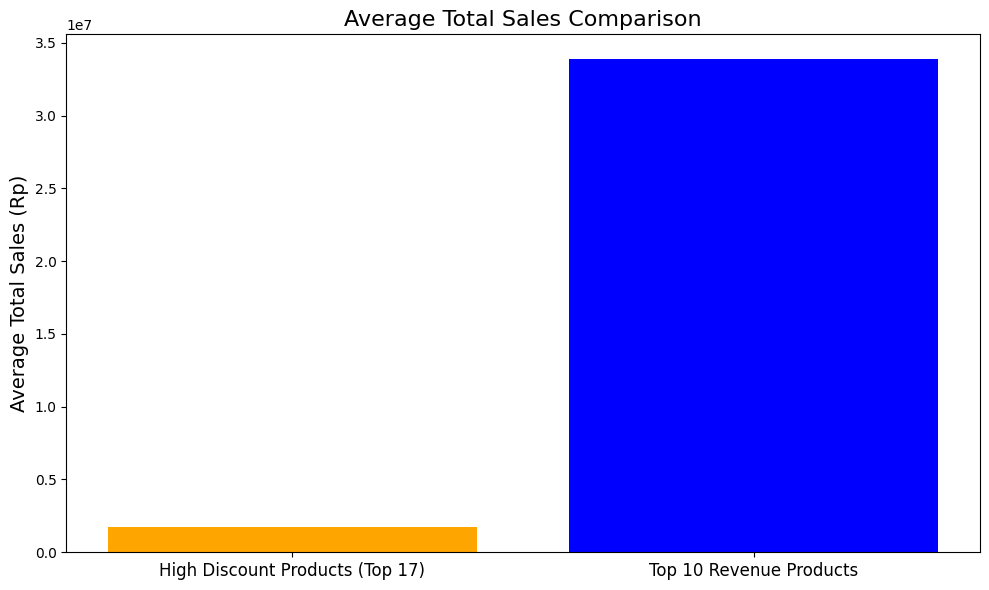

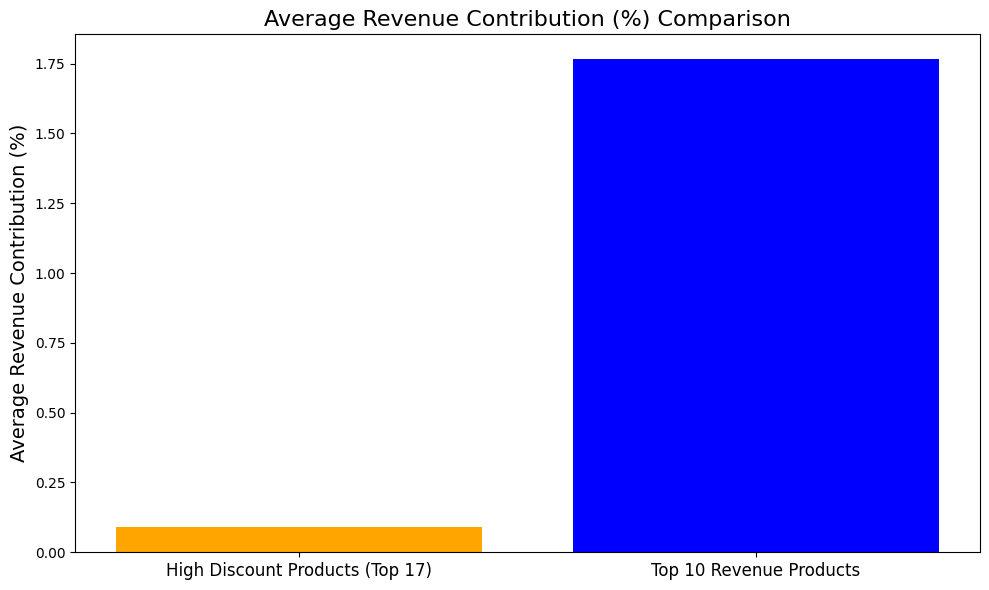

,Category,Average Total Sales (Rp),Average Revenue Contribution (%)
0,High Discount Products (Top 17),"Rp 1,740,633",0.090759
1,Top 10 Revenue Products,"Rp 33,881,359",1.766619


In [54]:
# Define the 17 high-discount items
top_17_discount_items = [
    'MKMSXH0003', 'MKK00002', 'MKI00038', 'MKK00004', 'MKK00010', 
    'MKMCA0035', 'MKGD0014', 'MKMCA0087', 'MKMSXH0001', 'MKI00066', 
    'MKI00056', 'MKI00067', 'MKGD0028', 'MKGD0010', 'MKI00072', 
    'MKGD0004', 'MKGD0011'
]

# Filter revenue data for high-discount products
high_discount_sales = df[df['Kode_Item'].isin(top_17_discount_items)].groupby('Kode_Item').agg({
    'Total': 'sum'
}).rename(columns={'Total': 'Total Sales'})

# Calculate revenue contribution percentage for high-discount products
high_discount_sales['Revenue Contribution (%)'] = (high_discount_sales['Total Sales'] / total_revenue) * 100

# Calculate averages for high-discount products
avg_high_discount_sales = high_discount_sales['Total Sales'].mean()
avg_high_discount_contribution = high_discount_sales['Revenue Contribution (%)'].mean()

# Calculate averages for the top 10 revenue products
avg_top_10_sales = top_10_items['Total Sales'].mean()
avg_top_10_contribution = top_10_items['Revenue Contribution (%)'].mean()

# Combine data for comparison
comparison_df = pd.DataFrame({
    'Category': ['High Discount Products (Top 17)', 'Top 10 Revenue Products'],
    'Average Total Sales (Rp)': [avg_high_discount_sales, avg_top_10_sales],
    'Average Revenue Contribution (%)': [avg_high_discount_contribution, avg_top_10_contribution]
})

# Format the "Average Total Sales (Rp)" column as Rupiah
comparison_df['Average Total Sales (Rp)'] = comparison_df['Average Total Sales (Rp)'].apply(lambda x: f"Rp {x:,.0f}")

# Visualization: Bar chart for total sales
plt.figure(figsize=(10, 6))
colors_sales = ['orange', 'blue']
plt.bar(comparison_df['Category'], 
        [avg_high_discount_sales, avg_top_10_sales], 
        color=colors_sales)
plt.title('Average Total Sales Comparison', fontsize=16)
plt.ylabel('Average Total Sales (Rp)', fontsize=14)
plt.xticks(fontsize=12)
plt.tight_layout()
plt.show()

# Visualization: Bar chart for revenue contribution
plt.figure(figsize=(10, 6))
colors_contribution = ['orange', 'blue']
plt.bar(comparison_df['Category'], 
        [avg_high_discount_contribution, avg_top_10_contribution], 
        color=colors_contribution)
plt.title('Average Revenue Contribution (%) Comparison', fontsize=16)
plt.ylabel('Average Revenue Contribution (%)', fontsize=14)
plt.xticks(fontsize=12)
plt.tight_layout()
plt.show()

# Display the comparison DataFrame
comparison_df

- The top 17 products analyzed here were selected from the “Top 20 Items with the Highest Discount Values”. These items were identified based on having some of the highest discount percentages, often exceeding 60%.
- Despite receiving significant discounts, the analysis reveals that these products perform poorly in terms of average total sales and revenue contribution when compared to the Top 10 Revenue Products, which represent the highest-selling items with the largest revenue contributions.